# **Face Mask Detection with Live Alert System**

## **Preprocess Images**

In [65]:
import cv2
import os

data_path = 'Data'

categories = os.listdir(data_path) #get folders

labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Mask_weared_incorrect': 0, 'Without_mask': 1, 'With_Mask': 2}
['Mask_weared_incorrect', 'Without_mask', 'With_Mask']
[0, 1, 2]


In [67]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
             print('Expection',e)

In [69]:
import numpy as np

data=np.array(data)/255.0

print(data.shape)

data=np.reshape(data,(data.shape[0],img_size,img_size,1))

target = np.array(target)

from keras.utils import to_categorical

target=to_categorical(target)
print(target)

(143, 100, 100)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]


--- 

## **Train The Model**

In [71]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [73]:
data.shape

(143, 100, 100, 1)

In [75]:
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))

model.add(Dense(3,activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.1)

In [81]:
history = model.fit(xtrain,ytrain,epochs=10, validation_split=0.2)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 808ms/step - accuracy: 0.3050 - loss: 2.5550 - val_accuracy: 0.3077 - val_loss: 1.1017
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 674ms/step - accuracy: 0.4859 - loss: 1.0823 - val_accuracy: 0.2308 - val_loss: 1.1121
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.4526 - loss: 1.0010 - val_accuracy: 0.6154 - val_loss: 1.1589
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 632ms/step - accuracy: 0.6031 - loss: 0.9050 - val_accuracy: 0.5769 - val_loss: 0.9024
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.7817 - loss: 0.6162 - val_accuracy: 0.6923 - val_loss: 0.7885
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.7880 - loss: 0.5184 - val_accuracy: 0.5000 - val_loss: 1.1771
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.8488 - loss: 0.3634 - val_accuracy: 0.5769 - val_loss: 1.1729
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 672ms/step - accuracy: 0.8991 - loss: 0.2506 - val_accuracy: 0.5385 - val_loss:

In [82]:
test_loss, test_accuracy = model.evaluate(xtest,ytest)
print(f"test_accuracy: {test_accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.6000 - loss: 1.3187
test_accuracy: 60.00%


In [83]:
print(f"{test_loss*100:.2f}%")

131.87%


In [224]:
y_pred_prob = model.predict(xtest)
y_pred_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


array([[9.97742414e-01, 1.51851901e-03, 7.39146664e-04],
       [1.14737585e-01, 2.05855351e-02, 8.64676833e-01],
       [7.33844042e-02, 9.06673670e-01, 1.99419223e-02],
       [4.30298410e-03, 9.50810015e-01, 4.48869988e-02],
       [1.96929229e-03, 9.41032112e-01, 5.69985323e-02],
       [1.73043504e-01, 1.09633930e-01, 7.17322528e-01],
       [3.02752852e-01, 3.38799879e-03, 6.93859160e-01],
       [1.10485489e-02, 9.86777484e-01, 2.17393809e-03],
       [7.10267425e-01, 6.95737749e-02, 2.20158771e-01],
       [8.56039166e-01, 2.45706234e-02, 1.19390123e-01],
       [4.21297848e-01, 2.65874565e-01, 3.12827647e-01],
       [4.84460056e-01, 3.24966125e-02, 4.83043343e-01],
       [5.67904599e-02, 3.01822880e-03, 9.40191329e-01],
       [5.33262432e-01, 1.50497751e-02, 4.51687813e-01],
       [9.76463675e-01, 5.81289409e-04, 2.29550526e-02]], dtype=float32)

In [226]:
ytest

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

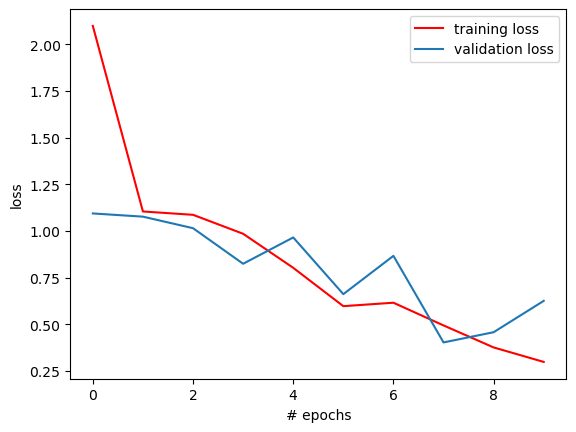

In [228]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()

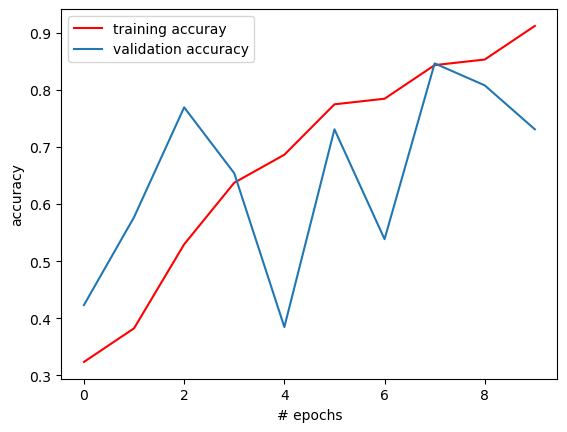

In [230]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],'r',label='training accuray')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()

In [179]:
model.save("facedetector2.h5")

---

## **Mask Prediction**

In [30]:
from tensorflow.keras.models import load_model

model = load_model('facedetector2.h5')

In [32]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 98, 98, 200)         │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 49, 49, 200)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 47, 47, 100)         │         180,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 47, 47, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 220900)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 220900)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │      11,045,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,227,305 (42.83 MB)

 Trainable params: 11,227,303 (42.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [36]:
img = image.load_img('51.jpeg',target_size=(100, 100, 1), color_mode='grayscale')
img_array = image.img_to_array(img)

#normalise img
img_array1 = img_array / 255.0
print('img_array1 = ',img_array1.shape)

img_array = img_array1.reshape(1,100,100)

predictions = model.predict(img_array)

img_array1 =  (100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
pred = [[0.41727203 0.03246604 0.5502619 ]]
2
[0.41727203 0.03246604 0.5502619 ]
with_mask


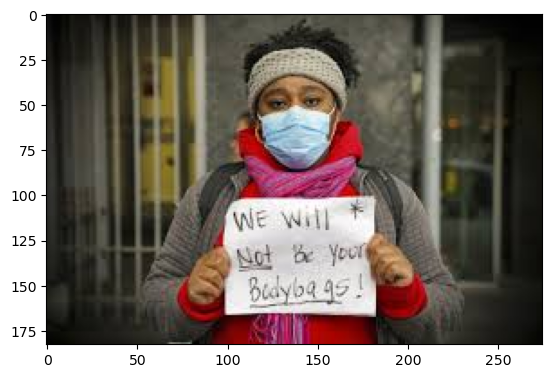

In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img=image.load_img('51.jpeg', target_size=(100,100,3)) 

imag=cv2.imread('51.jpeg') 

gray=cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY) 

out=np.expand_dims(gray,axis=0) 

final_img=out/255.0

pred=model.predict(final_img) 
print("pred =",pred) 

max_index=np.argmax(pred[0]) 
print(max_index) 

emotions=( 'Mask_weared_incorrect','without mask', 'with_mask',) 


predicted_emotion=emotions[max_index] 
print(pred[0]) 
print (predicted_emotion) 

plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)) 
#as opencv Loads in BGR format by default, we want to show it in RGB. 
plt.show()

---

## **Mask Detection With Alarm**

In [93]:
import cv2
from tensorflow.keras.models import load_model 
from keras.preprocessing.image import img_to_array
import numpy as np

In [95]:
model = load_model('facedetector2.h5')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source = cv2.VideoCapture(0)

labels_dict={0:'mask_incorrect',2:'with mask',1:'without mask'}
color_dict={0:(0,0,255),1:(255,0,0),2:(0,255,0)}

In [96]:
import cv2
import numpy as np
import pyttsx3
from playsound import playsound
import time
import threading

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # Speech rate

def speak_alert():
    engine.say("Please wear a mask")
    engine.runAndWait()

def play_alarm():
    playsound('alert.mp3')

last_alert_time = 0  # To prevent continuous alerting
alert_interval = 5 

while(True):

    ret,img = source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.05,5)

    for (x,y,w,h) in faces:

        face_image = gray[y:y+h,x:x+w]
        resized=cv2.resize(face_image,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        res=model.predict(reshaped)
        label=np.argmax(res,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],5)
        cv2.putText(img,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,255),5) 

        # If 'No Mask' detected
        if label == 1:  # Assuming 1 = No Mask
            current_time = time.time()
            if current_time - last_alert_time > alert_interval:
                # Launch both alerts in separate threads
                threading.Thread(target=speak_alert).start()
                threading.Thread(target=play_alarm).start()
                last_alert_time = current_time

    cv2.imshow('Face detection',img)
    key=cv2.waitKey(1)

    if(key==27):
        break

cv2.destroyAllWindows()
source.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━

In [252]:
pip install pyttsx3 playsound==1.2.2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from playsound import playsound
playsound('alert.mp3')  # or use full path